In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import itertools
from pathlib import Path
import os


In [182]:
def plots(dfs, x: str, y:str, labels=None):
    plt.figure(figsize=(10, 6))

    # Generate a color cycle
    colors = itertools.cycle(matplotlib.colormaps["Set1"].colors)

    for idx, df in enumerate(dfs):
        color = next(colors)
        label = labels[idx] if labels is not None else f"Data {idx + 1}"

        # Plot each DataFrame with a unique color and label
        plt.plot(df[x], df[y], marker='o', linestyle='-', color=color, label=label)

        # Annotate each point with the 'stride' value
        for i, txt in enumerate(df[x]):
            plt.annotate(txt, (df[x][i], df[y][i]), textcoords="offset points", xytext=(5,5), ha='center', color=color)

    # Set x-axis to log scale (base 2)
    # plt.xscale('log', base=2)
    # plt.yscale('log', base=10)

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{y} vs {x}')
    plt.legend()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.show()


def read_results(substring: str = ""):
    current_dir = Path(os.path.abspath(''))
    result_files = [path for path in current_dir.iterdir() if path.is_file() and path.stem.startswith("results") and substring in path.stem]
    dfs = [pd.read_csv(path) for path in result_files]
    return dfs, result_files


def build_plots_for_all_results(dfs, files, x, y):
    dfs = [
        df
        for df in dfs
    ]
    labels = [
        f"{path.stem}"
        for df, path in zip(dfs, files)
    ]
    plots(dfs, x=x, y=y, labels=labels)


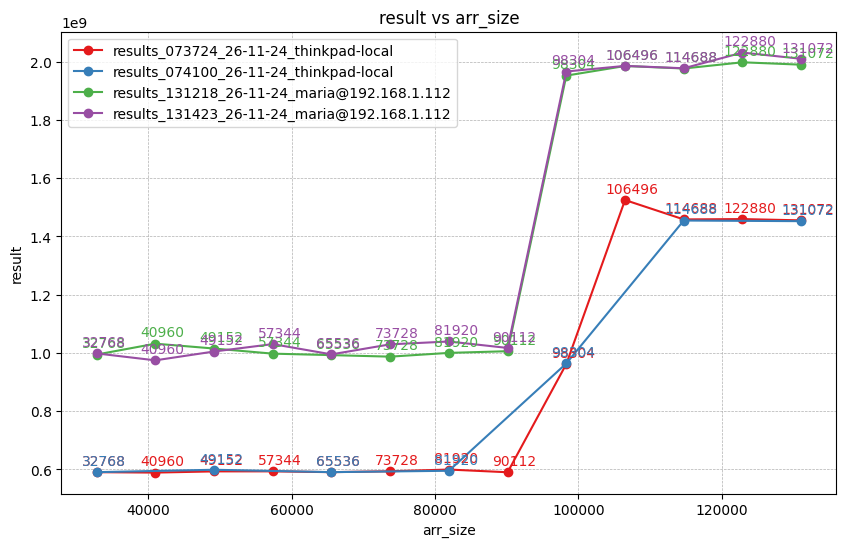

In [186]:
dfs, files = read_results("")
build_plots_for_all_results(dfs, files, x="arr_size", y="result")

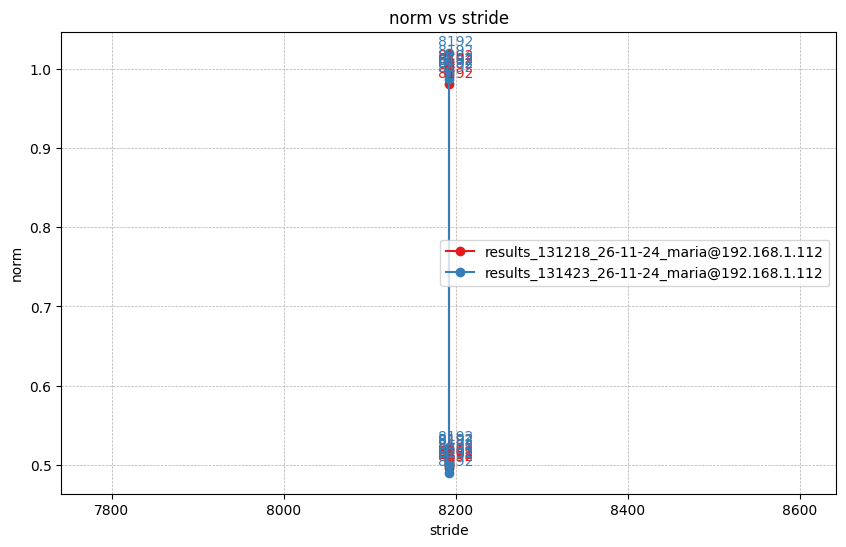

In [184]:
dfs, files = read_results("maria")
for df in dfs:
    df["norm"] = df["result"] / int(dfs[0].tail(1)["result"].iloc[0])
build_plots_for_all_results(dfs, files, x="stride", y="norm")

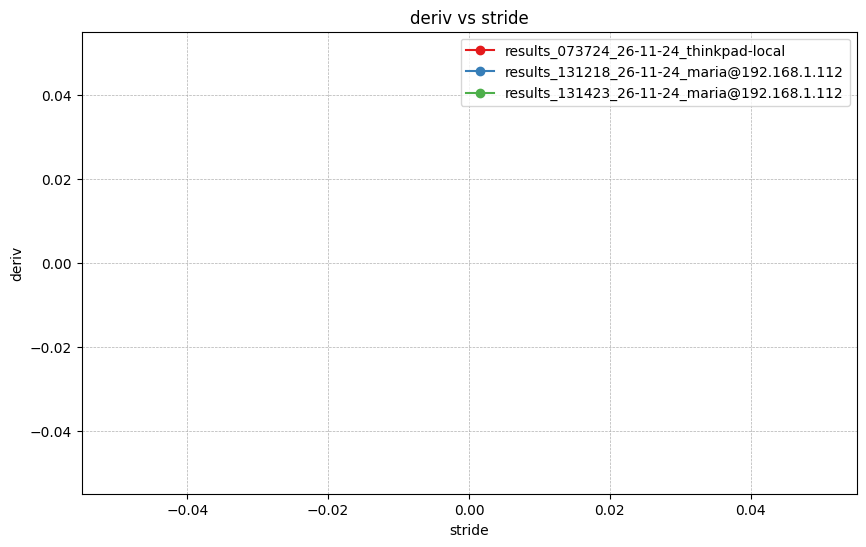

In [185]:
dfs, files = read_results("")
for df in dfs:
    df["norm"] = df["result"] / int(dfs[0].tail(1)["result"].iloc[0])
    df["result_diff"] = df["result"].diff().fillna(0)
    df["stride_diff"] = df["stride"].diff().fillna(0)
    df["deriv"] = df["result_diff"] / df["stride_diff"]
build_plots_for_all_results(dfs, files, x="stride", y="deriv")